<h1><center>DETECÇÃO FACIAL TECNORIA</center></h1>

In [ ]:
!ls /usr/local/share/opencv4/haarcascades

In [1]:
import io
import PIL.Image
import IPython
import cv2
import os
import imageio
import numpy as np
import math
from matplotlib import pyplot as plt
from IPython.display import Image, display, clear_output

## 1. Detecção em Imagens

In [2]:
# Load the cascade
classifier_folder = '/usr/local/share/opencv4/haarcascades/'
classifier_path = os.path.join(classifier_folder, 'haarcascade_frontalface_default.xml')
classifier_path2 = os.path.join(classifier_folder, 'haarcascade_eye.xml')
classifier_path3 = os.path.join(classifier_folder, 'haarcascade_smile.xml')
face_cascade = cv2.CascadeClassifier(classifier_path)
eye_cascade = cv2.CascadeClassifier(classifier_path2)
smile_cascade = cv2.CascadeClassifier(classifier_path3)
print(eye_cascade.empty())

False


In [3]:
# function for rendering an array as an image
def showarray(a, fmt='jpeg'):
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue())) 

In [4]:
# Read the input image
img1 = cv2.imread("friends1.png")

In [5]:
# Convert into grayscale
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

In [6]:
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.35, 5)

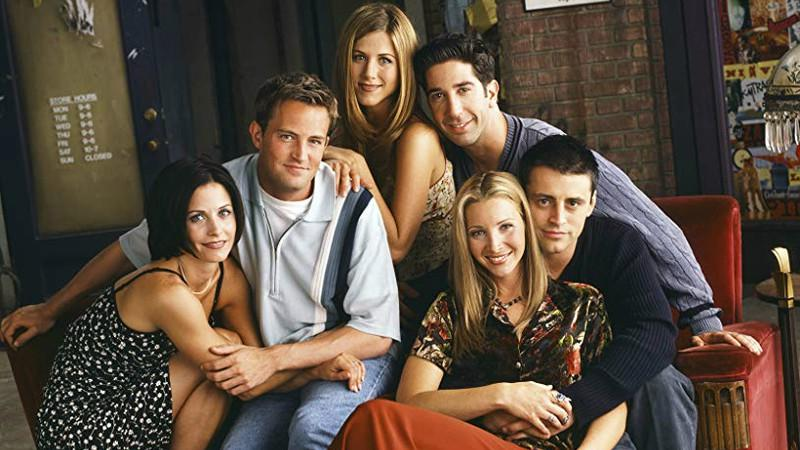

In [7]:
# RGB color
img_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
showarray(img_rgb)

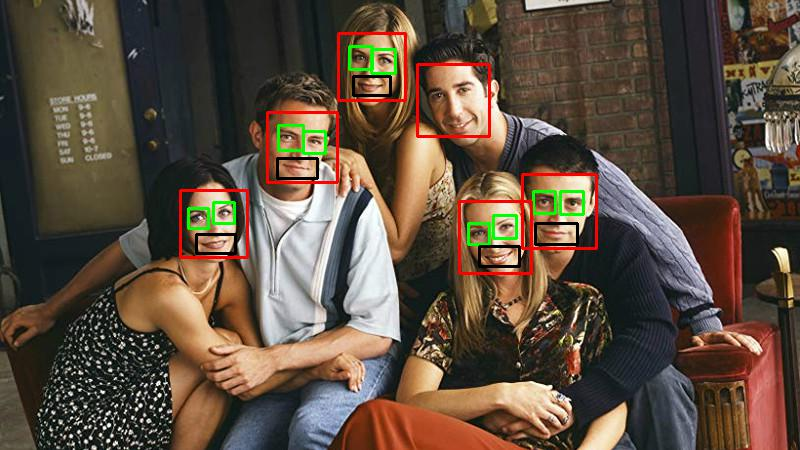

In [8]:
# Draw rectangle around the faces
for (x,y,w,h) in faces:
    img1 = img1.copy()
    img1 = cv2.rectangle(img_rgb, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img1[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    smile = smile_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    for (sx,sy,sw,sh) in smile:
        cv2.rectangle(roi_color,(sx,sy),(sx+sw,sy+sh),(0,0,0),2)
        
showarray(img1)

## 2. Detecção de Proximidade

In [9]:
# Read the input image
img2 = cv2.imread("friends2.png")

In [10]:
# Convert into grayscale
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

In [11]:
faces = face_cascade.detectMultiScale(gray2, 1.3, 5)

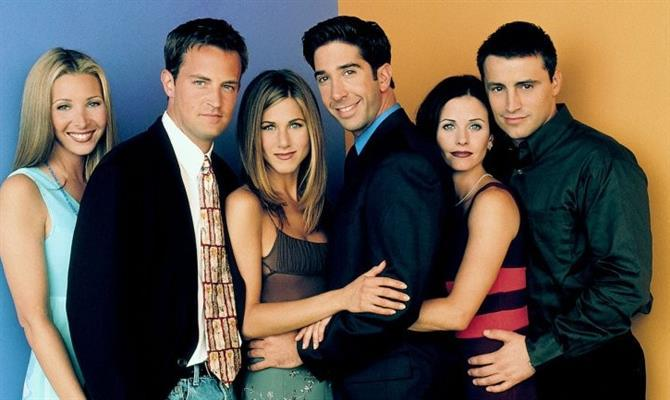

In [12]:
# RGB color
img_rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
showarray(img_rgb2)

In [13]:
# Detect lines and columns
linhas = len(faces)
try:
    colunas = len(faces[0])
except:
    colunas = 0

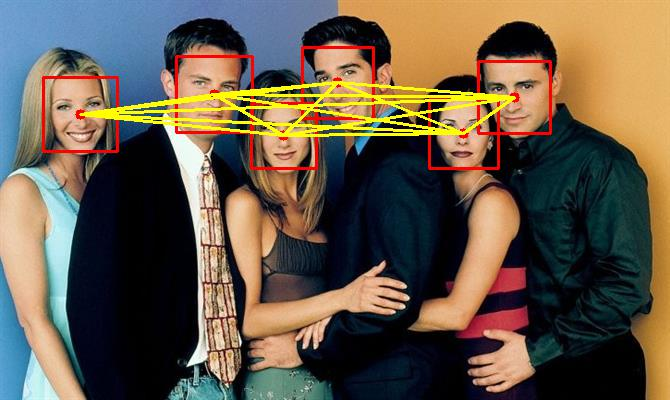

In [14]:
# Draw rectangle around the faces
for (x,y,w,h) in faces:
    img2 = cv2.rectangle(img_rgb2, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
    #Fazer circulo no meio do retangulo
    img2 = cv2.circle(img2, (x+w//2, y+h//2), 5, (255,0 ,0), -1)
    
    #Função para traçar linhas
    if linhas>1 and colunas>=1: 
        for x in range(linhas):
            for y in range(linhas):
                dist = (((faces[x][0]+(faces[x][2]//2))-(faces[y][0]+(faces[y][2]//2)))**2 + (((faces[x][1]+(faces[x][3]//2))-(faces[y][1]+(faces[y][3]//2))))**2)
                b = math.sqrt(dist)
                if b<100:
                    img2 = cv2.line(img_rgb2, (faces[x][0]+faces[x][2]//2,faces[x][1]+faces[x][3]//2), (faces[y][0]+faces[y][2]//2, faces[y][1]+faces[y][3]//2), (255, 255, 0), 2) 
showarray(img2)

## 3. Detecção em Vídeo

In [70]:
cap = cv2.VideoCapture('video.avi')
cap.isOpened()

True

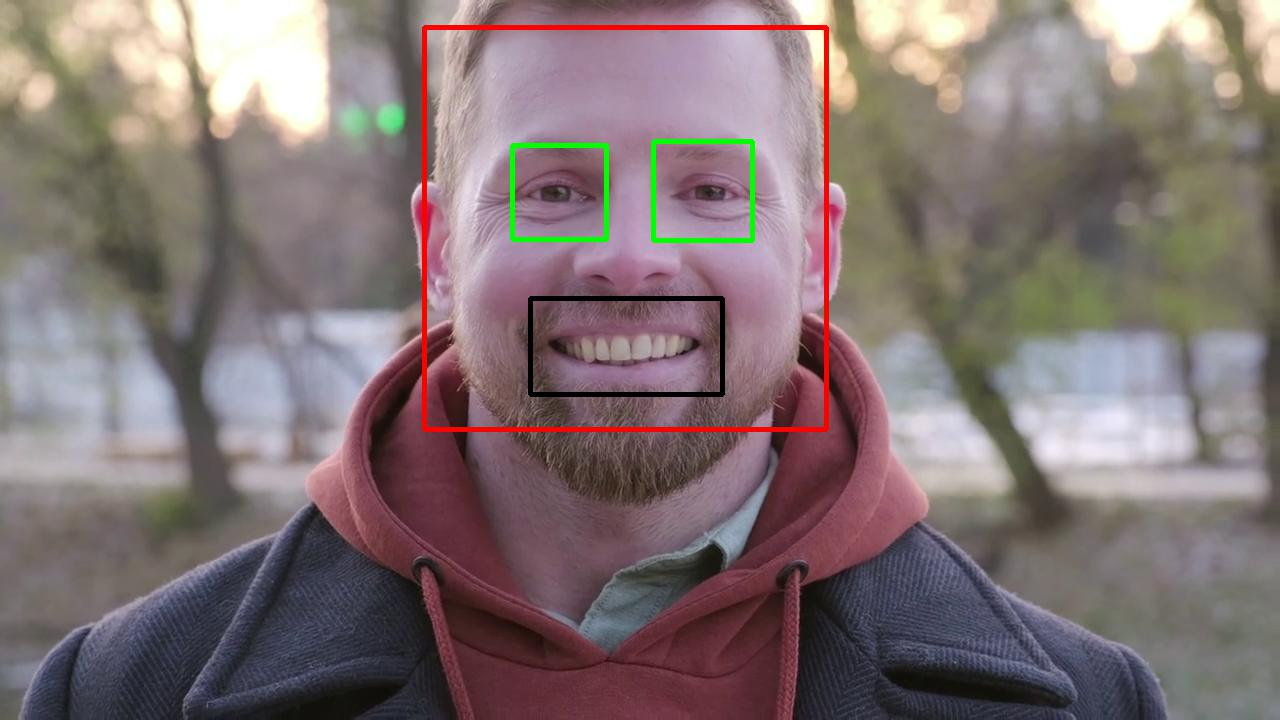

In [13]:
i=1

while(cap.isOpened()):  
    ret, frame = cap.read()  
    
    if ret == False:
        break 
  
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY ) 
    faces = face_cascade.detectMultiScale(gray,1.3, 4)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    for (x, y ,w ,h) in faces:
        cv2.rectangle(frame ,(x,y),(x+w , y+h), (255,0,0)  ,3)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.3, 4)
        smile = smile_cascade.detectMultiScale(roi_gray, 1.1, 99)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0), 3)
        for (sx,sy,sw,sh) in smile:
            cv2.rectangle(roi_color,(sx,sy),(sx+sw,sy+sh),(0,0,0), 3)
        
  
    # write the frame  
    if i%50 == 0:
        cv2.imwrite('teste_video'+str(i)+'.jpg',frame)
    i+=1  
  
    showarray(frame)    
    clear_output(wait = True)


# Release everything if job is finished  
cap.release()
cv2.destroyAllWindows()

## 4. Pré processamento de Imagens

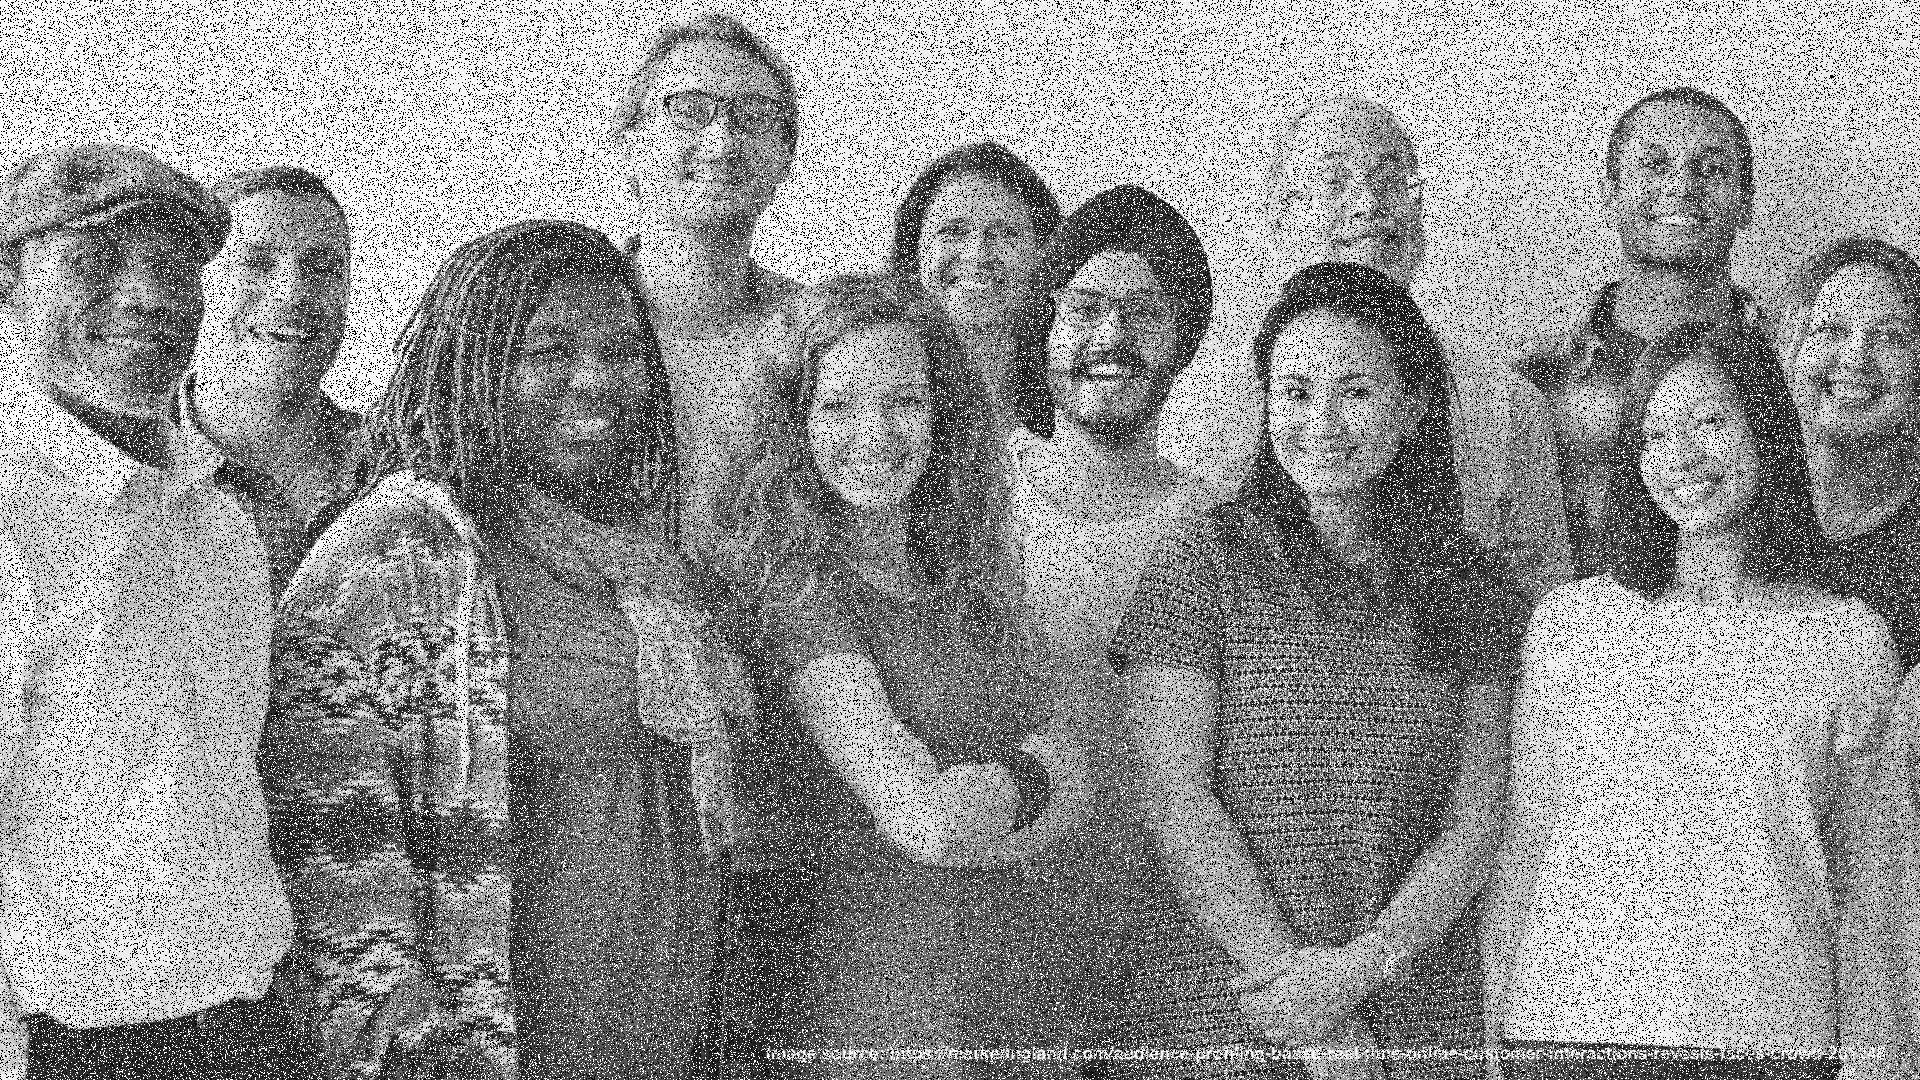

In [33]:
# Read the input image
img_crowd = cv2.imread("crowd01_bad.jpg")
showarray(img_crowd)

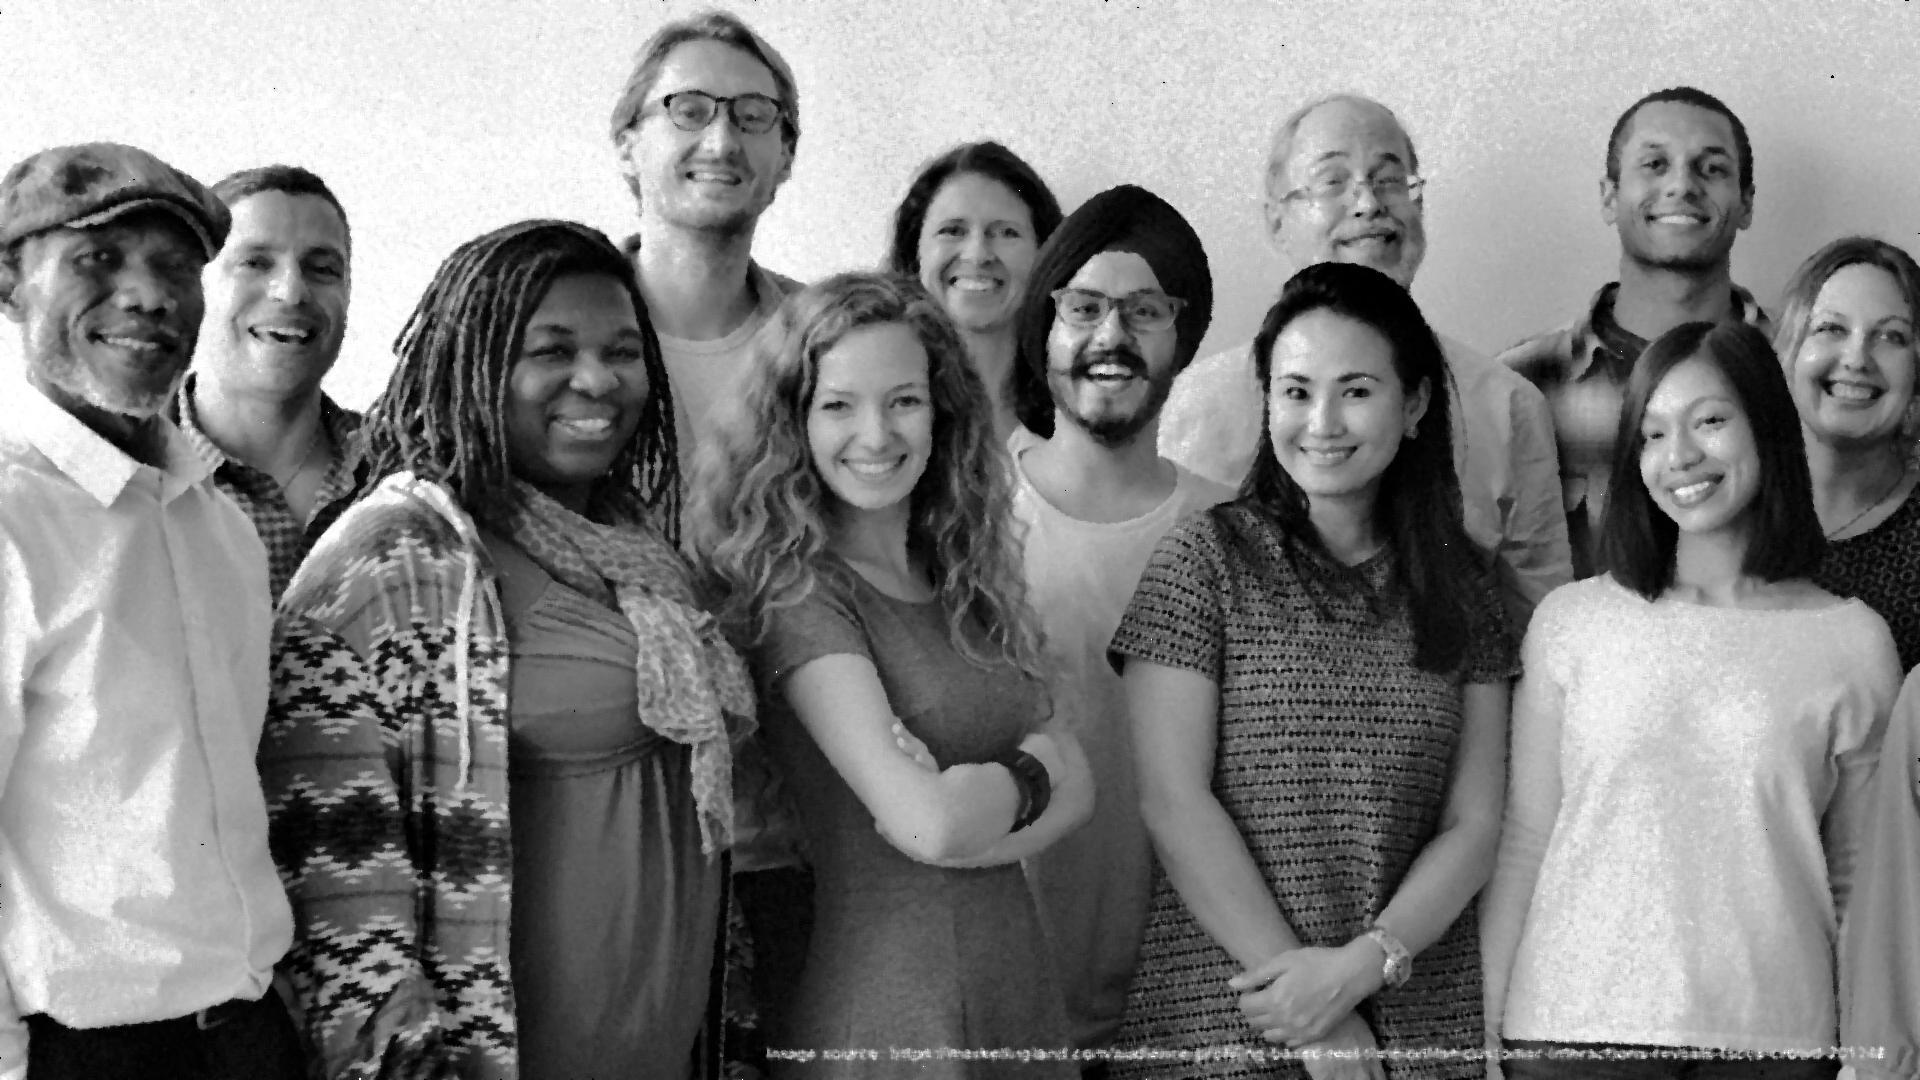

In [34]:
#Histograma
img_equalize = cv2.medianBlur(img_crowd, 5)

R, G, B = cv2.split(img_equalize)

output1_R = cv2.equalizeHist(R)
output1_G = cv2.equalizeHist(G)
output1_B = cv2.equalizeHist(B)

equ = cv2.merge((output1_R, output1_G, output1_B))

showarray(equ)

In [35]:
#Filtros
#filtro = cv2.GaussianBlur(img,(5,5),0)
filtro = cv2.medianBlur(img_crowd, 5)

In [36]:
# Detect faces
faces = face_cascade.detectMultiScale(filtro, 1.35, 5)

Para essa imagem foram encontradas 10 rostos!


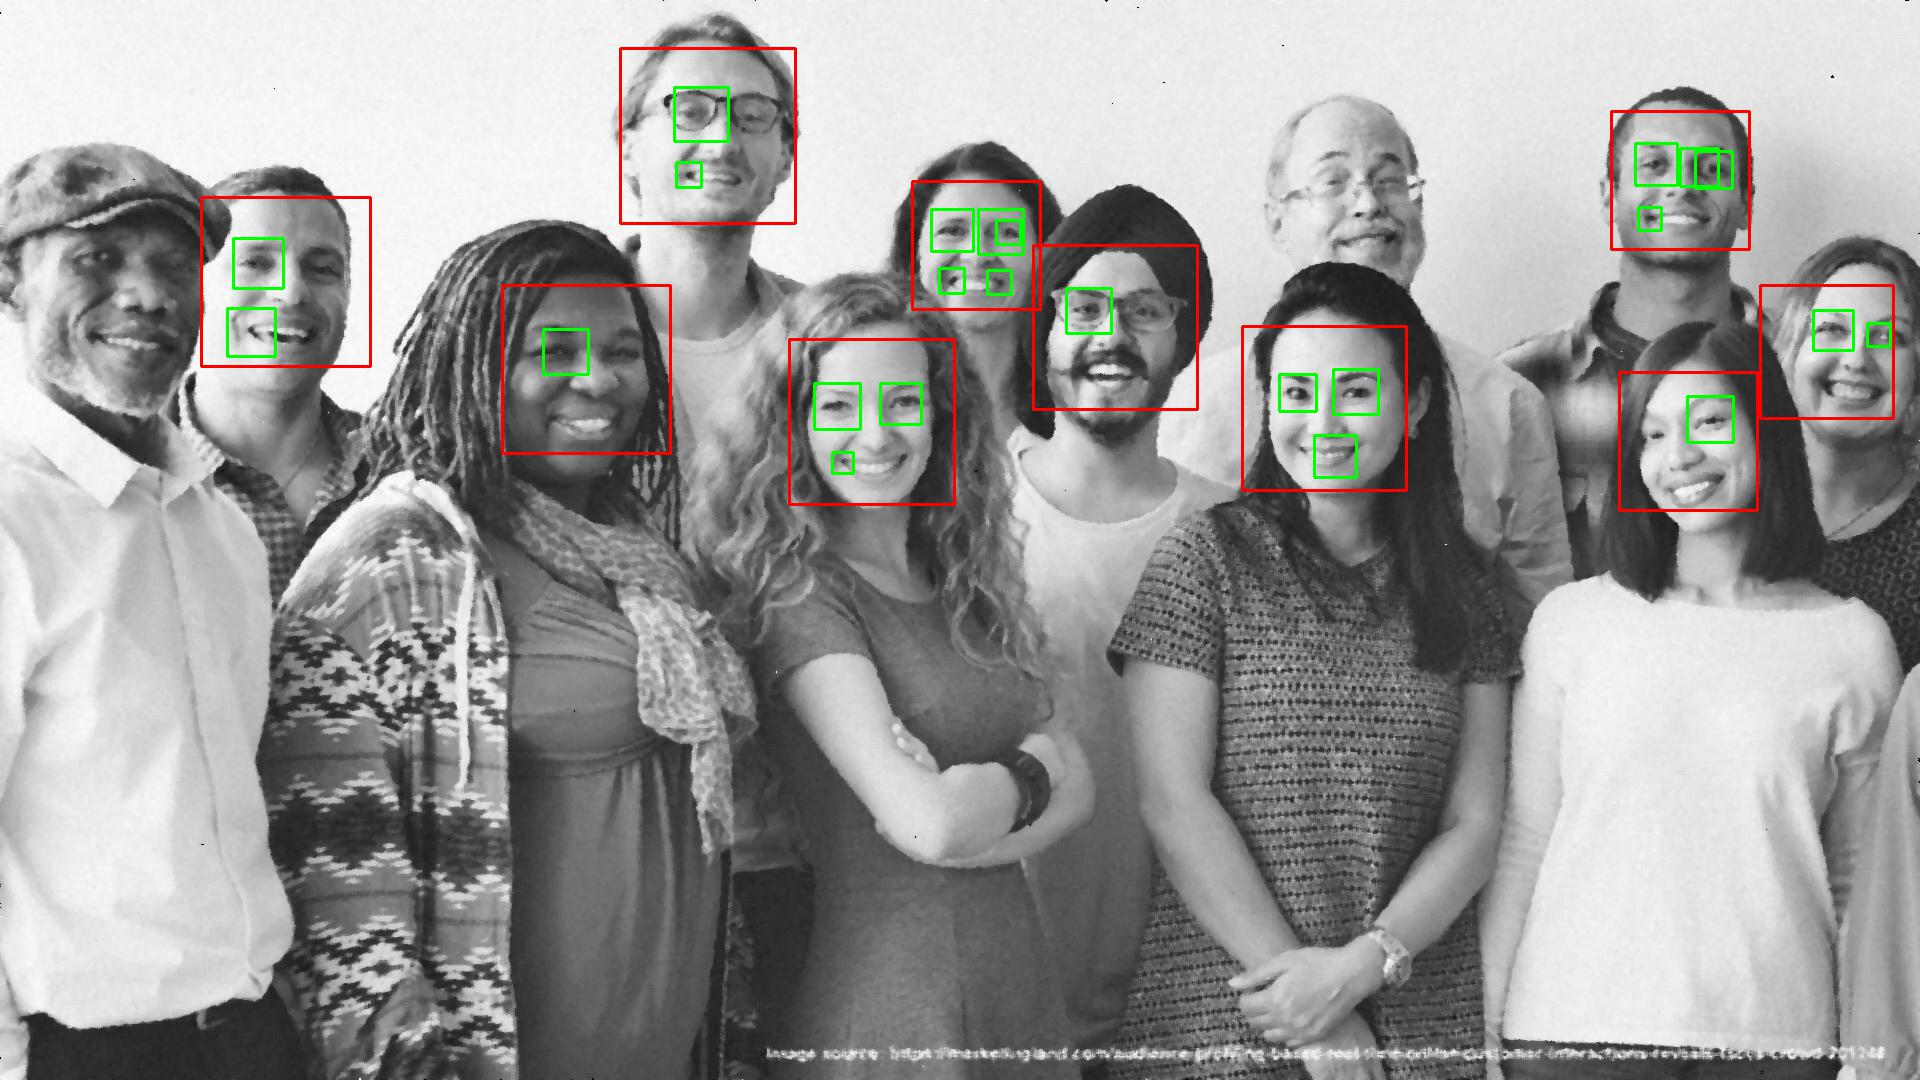

In [37]:
# Usando filtros e contando rostos
for (x,y,w,h) in faces:
    imagem = img_crowd.copy()
    imagem = cv2.rectangle(filtro, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_gray = filtro[y:y+h, x:x+w]
    roi_color = imagem[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    #smile = smile_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    #for (sx,sy,sw,sh) in smile:
    #    cv2.rectangle(roi_color,(sx,sy),(sx+sw,sy+sh),(0,0,0),2)
        
print("Para essa imagem foram encontradas {0} rostos!".format(len(faces)))            
showarray(imagem)

Imagem salva com sucesso!.


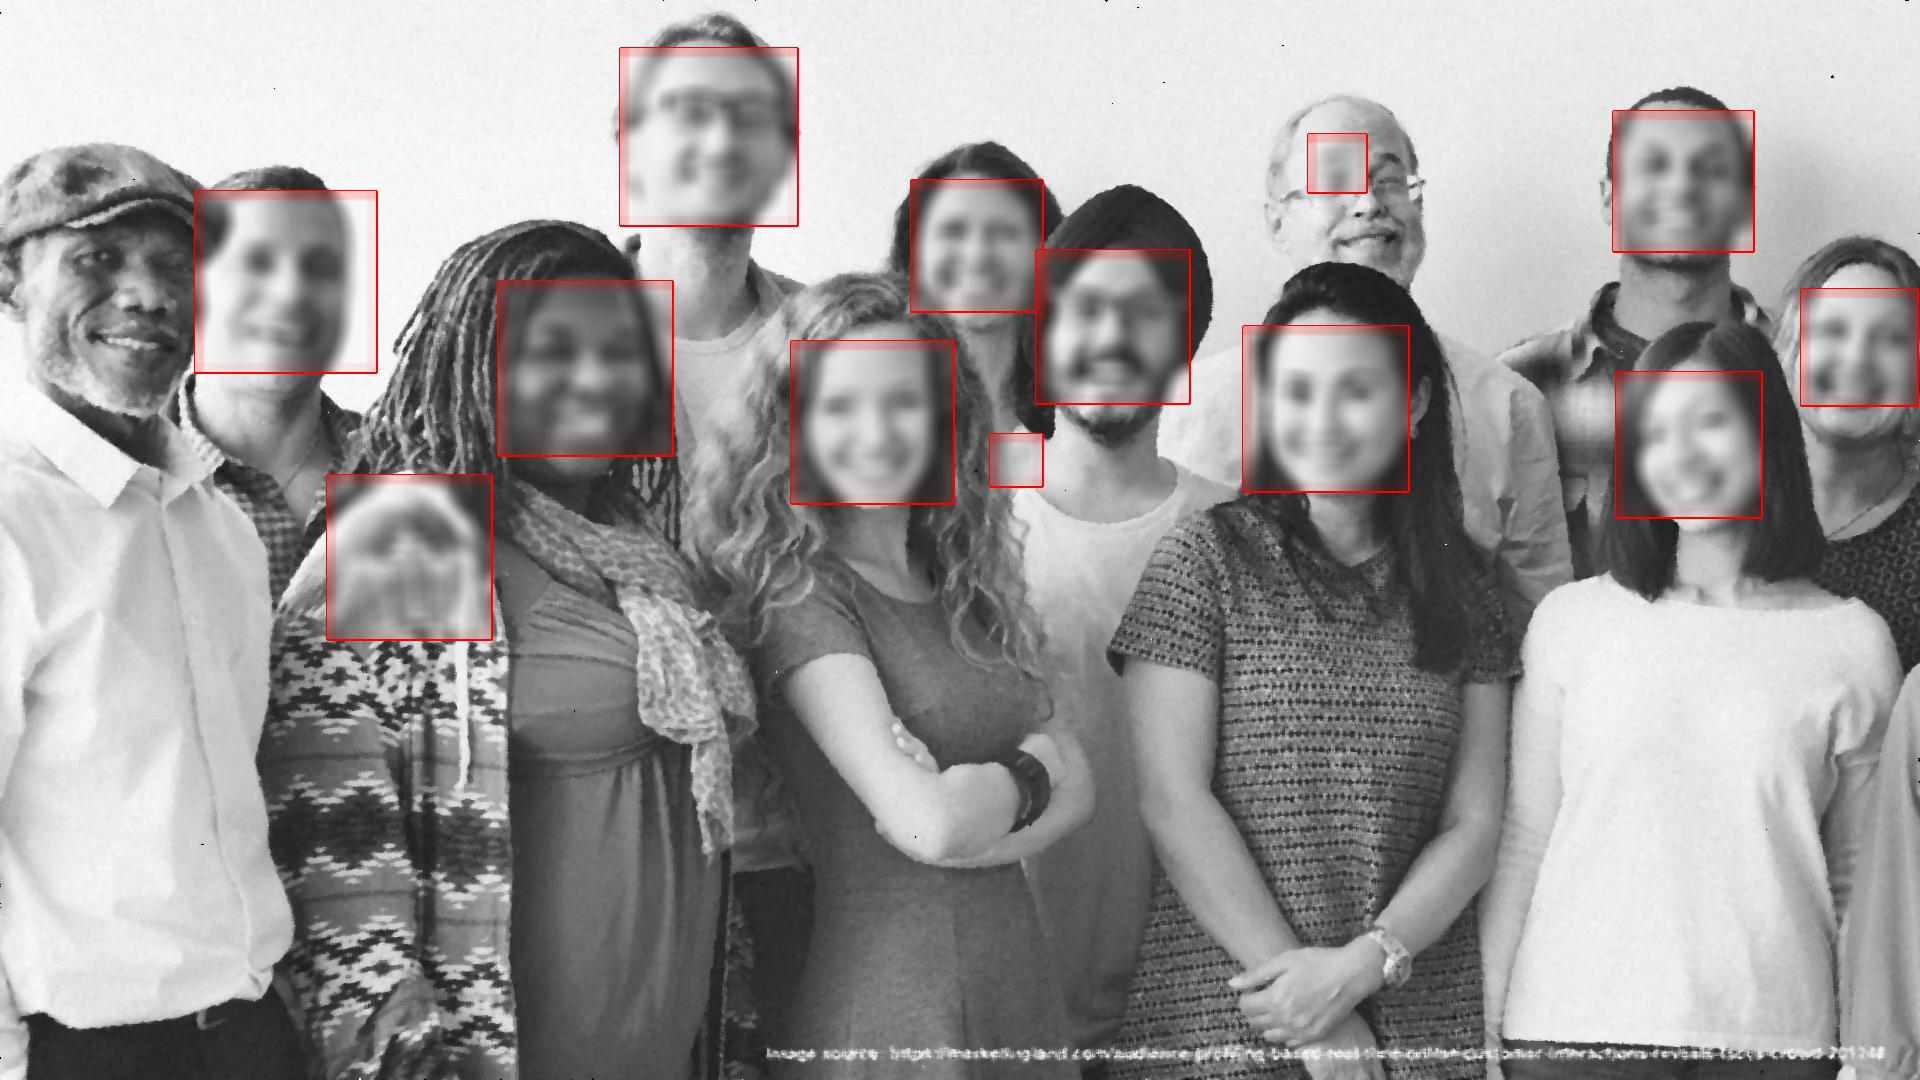

In [38]:
#Anonimização de pessoas
img_gray = cv2.medianBlur(img_crowd, 5)
faces = face_cascade.detectMultiScale (img_gray, 1.3, 5)

for (x,y,w,h) in faces:
    img = img_crowd.copy()
    img = cv2.rectangle(img_gray, (x, y), (x+w, y+h), (255, 0, 0), 2)
    roi_filtro = img_gray[y:y+h, x:x+w]
    #roi_color = img_gray[y:y+h, x:x+w]
    aq = cv2.GaussianBlur(roi_filtro,(17, 17), 17)
    img_gray[y:y+h, x:x+w] = aq
    
    #save matrix/array as image file
    isWritten = cv2.imwrite('teste_anonimizacao.jpg', img_gray)

if isWritten:
    print('Imagem salva com sucesso!.')
    
showarray(img_gray)
#print(faces)